## Dictionary with users' preferences

In [93]:
# A dictionary of movie critics and their ratings of a small
# set of movies
critics={'Lisa Rose': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.5,
 'Just My Luck': 3.0, 'Superman Returns': 3.5, 'You, Me and Dupree': 2.5, 
 'The Night Listener': 3.0},
'Gene Seymour': {'Lady in the Water': 3.0, 'Snakes on a Plane': 3.5, 
 'Just My Luck': 1.5, 'Superman Returns': 5.0, 'The Night Listener': 3.0, 
 'You, Me and Dupree': 3.5}, 
'Michael Phillips': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.0,
 'Superman Returns': 3.5, 'The Night Listener': 4.0},
'Claudia Puig': {'Snakes on a Plane': 3.5, 'Just My Luck': 3.0,
 'The Night Listener': 4.5, 'Superman Returns': 4.0, 
 'You, Me and Dupree': 2.5},
'Mick LaSalle': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0, 
 'Just My Luck': 2.0, 'Superman Returns': 3.0, 'The Night Listener': 3.0,
 'You, Me and Dupree': 2.0}, 
'Jack Matthews': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0,
 'The Night Listener': 3.0, 'Superman Returns': 5.0, 'You, Me and Dupree': 3.5},
'Toby': {'Snakes on a Plane':4.5,'You, Me and Dupree':1.0,'Superman Returns':4.0}}


In [109]:
critics['Toby']

{'Snakes on a Plane': 4.5, 'Superman Returns': 4.0, 'You, Me and Dupree': 1.0}

In [110]:
critics['Lisa Rose']['Lady in the Water']

2.5

In [49]:
#Claculate Euclidean distance
from math import sqrt
sqrt(pow(5-4,2)+pow(4-1,2))

3.1622776601683795

In [50]:
#Transform distance to similarity
1/(1+sqrt(pow(5-4,2)+pow(4-1,2)))

0.2402530733520421

In [51]:
# Returns a distance-based similarity score for person1 and person2
def sim_distance(prefs,person1,person2):
# Get the list of shared_items
    si={}
    for item in prefs[person1]:
        if item in prefs[person2]:
            si[item]=1
# if they have no ratings in common, return 0
    if len(si)==0: return 0
# Add up the squares of all the differences
    sum_of_squares=sum([pow(prefs[person1][item]-prefs[person2][item],2)
    for item in prefs[person1] if item in prefs[person2]])
    return 1/(1+sum_of_squares)

    

In [6]:
sim_distance(critics, 'Lisa Rose','Gene Seymour')

0.14814814814814814

In [52]:
# Returns the Pearson correlation coefficient for p1 and p2
def sim_pearson(prefs,p1,p2):
# Get the list of mutually rated items
    si={}
    for item in prefs[p1]: 
        if item in prefs[p2]: si[item]=1

    # if they have no ratings in common, return 0
    if len(si)==0: return 0

    # Sum calculations
    n=len(si)
  
    # Sums of all the preferences
    sum1=sum([prefs[p1][it] for it in si])
    sum2=sum([prefs[p2][it] for it in si])
  
    # Sums of the squares
    sum1Sq=sum([pow(prefs[p1][it],2) for it in si])
    sum2Sq=sum([pow(prefs[p2][it],2) for it in si])	
  
    # Sum of the products
    pSum=sum([prefs[p1][it]*prefs[p2][it] for it in si])
  
    # Calculate r (Pearson score)
    num=pSum-(sum1*sum2/n)
    den=np.sqrt((sum1Sq-pow(sum1,2)/n)*(sum2Sq-pow(sum2,2)/n))
    if den==0: return 0

    r=num/den

    return r

In [10]:
sim_pearson(critics,'Lisa Rose','Gene Seymour')

0.39605901719066977

## Ranking of critics

In [53]:
# Returns the best matches for person from the prefs dictionary. 
# Number of results and similarity function are optional params.
def topMatches(prefs, person, n=5, similarity=sim_pearson):
    scores=[(similarity(prefs,person,other),other)
    for other in prefs if other!=person]
    # sort the marks in descending order
    scores.sort()
    scores.reverse( )
    return scores[0:n]

In [788]:
topMatches(critics,'Toby',n=3)

[(0.9912407071619299, 'Lisa Rose'),
 (0.9244734516419049, 'Mick LaSalle'),
 (0.8934051474415647, 'Claudia Puig')]

## Movie recommendation

In [54]:
# Gets recommendations for a person by using a weighted average
# of every other user's rankings
def getRecommendations(prefs, person, n, similarity):
    totals = {}
    simSums = {}
    others = {k:v for (v,k) in topMatches(prefs, person, n, similarity)}
    for other in others:
    # don't compare me to myself
        if other == person: continue
        sim = others[other]
    # ignore scores of zero or lower
        if sim<=0: continue
        for item in prefs[other]:
    # only score movies I haven't seen yet
            if item not in prefs[person] or prefs[person][item]==0:
    # Similarity * Score
                totals.setdefault(item,0)
                totals[item]+=prefs[other][item]*sim
        # Sum of similarities
                simSums.setdefault(item,0)
                simSums[item]+=sim
    # Create the normalized list
    rankings=[(total/simSums[item],item) for item,total in totals.items( )]
    # Return the sorted list
    rankings.sort( )
    rankings.reverse( )
    return rankings

In [802]:
getRecommendations(critics,'Toby', n = 10)

[(3.3477895267131013, 'The Night Listener'),
 (2.832549918264162, 'Lady in the Water'),
 (2.530980703765565, 'Just My Luck')]

## Similarity of items

How to change

{'Lisa Rose': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.5},
'Gene Seymour': {'Lady in the Water': 3.0, 'Snakes on a Plane': 3.5}}

by

{'Lady in the Water':{'Lisa Rose':2.5,'Gene Seymour':3.0},
'Snakes on a Plane':{'Lisa Rose':3.5,'Gene Seymour':3.5}}?


In [55]:
def transformPrefs(prefs):
    result={}
    for person in prefs:
        for item in prefs[person]:
            result.setdefault(item,{})
    # Flip item and person
            result[item][person]=prefs[person][item]
    return result

In [24]:
movies=transformPrefs(critics)

In [94]:
movies

NameError: name 'movies' is not defined

In [26]:
topMatches(movies,'Superman Returns')

[(0.6579516949597695, 'You, Me and Dupree'),
 (0.4879500364742689, 'Lady in the Water'),
 (0.11180339887498941, 'Snakes on a Plane'),
 (-0.1798471947990544, 'The Night Listener'),
 (-0.42289003161103106, 'Just My Luck')]

In [126]:
getRecommendations(movies,'Just My Luck')

[(4.0, 'Michael Phillips'), (3.0, 'Jack Matthews')]

## Item-based collaborative filtering

In [56]:
def calculateSimilarItems(prefs, n=10,similarity=sim_distance):
    # Create a dictionary of items showing which other items they
    # are most similar to.
    result={}
    # Invert the preference matrix to be item-centric
    itemPrefs=transformPrefs(prefs)
    c=0
    for item in itemPrefs:
    # Status updates for large datasets
    #    c+=1
    #    if c%100==0: print ("%d / %d" % (c,len(itemPrefs)))
    # Find the most similar items to this one
        scores=topMatches(itemPrefs,item,n=n)
        result[item]=scores
    return result

In [95]:
itemsim=calculateSimilarItems(critics)
itemsim

{'Just My Luck': [(0.5555555555555556, 'The Night Listener'),
  (-0.3333333333333333, 'Snakes on a Plane'),
  (-0.42289003161103106, 'Superman Returns'),
  (-0.4856618642571827, 'You, Me and Dupree'),
  (-0.9449111825230676, 'Lady in the Water')],
 'Lady in the Water': [(0.7637626158259785, 'Snakes on a Plane'),
  (0.4879500364742689, 'Superman Returns'),
  (0.3333333333333333, 'You, Me and Dupree'),
  (-0.6123724356957927, 'The Night Listener'),
  (-0.9449111825230676, 'Just My Luck')],
 'Snakes on a Plane': [(0.7637626158259785, 'Lady in the Water'),
  (0.11180339887498941, 'Superman Returns'),
  (-0.3333333333333333, 'Just My Luck'),
  (-0.5663521139548527, 'The Night Listener'),
  (-0.6454972243679047, 'You, Me and Dupree')],
 'Superman Returns': [(0.6579516949597695, 'You, Me and Dupree'),
  (0.4879500364742689, 'Lady in the Water'),
  (0.11180339887498941, 'Snakes on a Plane'),
  (-0.1798471947990544, 'The Night Listener'),
  (-0.42289003161103106, 'Just My Luck')],
 'The Night L

In [57]:
def getRecommendedItems(prefs, user, itemMatch):
    userRatings=prefs[user]
    scores={}
    totalSim={}

    # Loop over items rated by this user
    for (item,rating) in userRatings.items():
        
    # Loop over items similar to this one
        for (similarity,item2) in itemMatch[item]:
    # Ignore if this user has already rated this item
            if item2 in userRatings: continue
        # Weighted sum of rating times similarity
            scores.setdefault(item2,0)
            scores[item2]+=similarity*rating
        # Sum of all the similarities
            totalSim.setdefault(item2,0)
            totalSim[item2]+=similarity
            if totalSim[item2]==0: totalSim[item2]=0.0000001 # to avoid division by zero
    # Divide each total score by total weighting to get an average
    rankings=[(score/totalSim[item],item) for item,score in scores.items( ) ]

    # Return the rankings from highest to lowest
    rankings.sort( )
    rankings.reverse( )
    return rankings

In [96]:
getRecommendedItems(critics, 'Toby', itemsim)

[(3.610031066802182, 'Lady in the Water'),
 (3.531395034185976, 'The Night Listener'),
 (2.9609998607242685, 'Just My Luck')]

## Recommendations for MovieLens dataset

Data source: http://grouplens.org/datasets/movielens/

In [58]:
def loadMovieLens(path='data/movielens'):
# Get movie titles
    movies={}    
    for line in codecs.open(path + '/u.item', encoding='utf-8', errors='ignore'):
        (id,title)=line.split('|')[0:2]
        movies[id]=title
# Load data
    prefs={}
    for line in open(path+'/u.data'):
        (user,movieid,rating,ts)=line.split('\t')
        prefs.setdefault(user,{})
        prefs[user][movies[movieid]]=float(rating)
    return prefs

In [97]:
getRecommendations(prefs,'87')[0:30]

NameError: name 'prefs' is not defined

# Tasks
## 1. Comparison of user-based and item-based collaborative filtering (5 out 10)

You need to implement MAE and RMSE quality measures to compare user-based and item-based approaches on MovieLens dataset (http://grouplens.org/datasets/movielens/).

* The training datasets have file extension '.base'. The training/test datasets' pairs are given as follows u1.base and u1.test, ..., u5.base and u5.test Each pair is a partition of the original data into  80%/20%  for training and test datasets respectively.
* For each method (user-based and item-based with vairous similarity measures) plot grpahs of MAE and RMSE agaist the number of nearest neighbours.
* If the results' quality is too poor (MAE>2.0) try variants 2.6 and 2.7 from http://files.grouplens.org/papers/FnT%20CF%20Recsys%20Survey.pdf

## 2. SVD-based (Singular Value Decomposition) recommendation (5 out 10)

* Select a proper SVD-based model's implementation  based on gradient descent: http://www.recsyswiki.com/wiki/Category:Software
 * E.g., Oscar Celma's implementation: http://ocelma.net/software/python-recsys/build/html/#
 * FunkSVD  http://lenskit.org/documentation/algorithms/svd/ (see also the original blog for details http://sifter.org/~simon/journal/20061211.html)
 * Makar Stetsenko implementation: https://github.com/Makazone/2ndYear-TermProject/

* Train the model and compare its quality by MAE and RMSE for the same split from Task 1.

### User- vs. Item-based recommendations.

In [65]:
import codecs
import numpy as np
import sklearn.metrics as metrics

Loading function

In [59]:
def loadMovieLens(path, n):
# Get movie titles
    movies={}    
    for line in codecs.open(path + '/u.item', encoding='utf-8', errors='ignore'):
        (id,title)=line.split('|')[0:2]
        movies[id]=title
# Load data
    prefs_train = {}
    for line in open(path + '/u' + str(n) + '.base'):
        (user,movieid,rating,ts)=line.split('\t')
        prefs_train.setdefault(user,{})
        prefs_train[user][movies[movieid]]=float(rating)
    prefs_test = {}
    for line in open(path + '/u' + str(n) + '.test'):
        (user, movieid, rating, ts)=line.split('\t')
        prefs_test.setdefault(user,{})
        prefs_test[user][movies[movieid]]=float(rating)
    return prefs_train, prefs_test

In [4]:
train, test = loadMovieLens(path = '/home/hpish/Data', n=5)

In [60]:
# Returns additional similarity metric: distance-based similarity score for person1 and person2
def sim_cosine(prefs,person1,person2):
# Get the list of shared_items
    si={}
    for item in prefs[person1]:
        if item in prefs[person2]:
            si[item]=1
# if they have no ratings in common, return 0
    if len(si)==0: return 0
# Add up the squares of all the differences
    A = np.array([prefs[person1][item] for item in si.keys()])
    B = np.array([prefs[person2][item] for item in si.keys()])
    cosine_sum=A.dot(np.transpose(B))
    return cosine_sum/(np.linalg.norm(A)*np.linalg.norm(B))

In [78]:
print(test['344'])

{u'Princess Bride, The (1987)': 5.0, u'Rock, The (1996)': 3.0, u'Secret of Roan Inish, The (1994)': 4.0, u'Everyone Says I Love You (1996)': 1.0, u'L.A. Confidential (1997)': 5.0, u'Fargo (1996)': 5.0, u'To Die For (1995)': 4.0, u'James and the Giant Peach (1996)': 4.0, u'Contact (1997)': 3.0, u"It's a Wonderful Life (1946)": 4.0, u'Fierce Creatures (1997)': 2.0, u'Father of the Bride Part II (1995)': 2.0}


Error functions:

In [61]:
def RMSEerr(rec, test):
    # UserRec: recommendations for user, dictionary
    # UserTest: test data, dictionary 
    s_rec = set(rec.keys())
    s_test = set(test.keys())
    intersect = set.intersection(s_rec, s_test)
    x = np.array([rec[item] for item in intersect])
    y = np.array([test[item] for item in intersect])
    if len(x)==0 or len(y)==0:
        return [0,0]
    return [1,metrics.mean_squared_error(x,y)]

In [62]:
def MAEerr(rec, test):
    # UserRec: recommendations for user, dictionary
    # UserTest: test data, dictionary 
    s_rec = set(rec.keys())
    s_test = set(test.keys())
    intersect = set.intersection(s_rec, s_test)
    x = np.array([rec[item] for item in intersect])
    y = np.array([test[item] for item in intersect])
    if len(x)==0 or len(y)==0:
        return [0,0]
    return [1,metrics.mean_absolute_error(x,y)]

In [66]:
data=[]
for s in range(1, 6):
    prefs_train, prefs_test = loadMovieLens(path = '/home/hpish/Data', n = s)
    data.append([prefs_train, prefs_test])

Applying our error metric to dataset (using 5-fold CV)

In [63]:
def CVerror(path, nneighbors, RecFunc, metric, similarity):
    CVerr = []
    # Loop over data partitions
    for s in range(0, 5): 
        prefs_train = data[s][0]
        prefs_test = data[s][1]
        Errsum = []
        if RecFunc == getRecommendedItems:
            ItemsSim = calculateSimilarItems(prefs_train, n=nneighbors,similarity = similarity)
            for i in prefs_train.keys():
                # solving no data error
                if i not in prefs_test.keys(): continue
                Rec = {f:s for (s,f) in getRecommendedItems(prefs_train, i, ItemsSim)}
                # Increment Split RSS
                if metric == 'rmse':
                    Errlocal = RMSEerr(Rec, prefs_test[i])
                else:
                    Errlocal = MAEerr(Rec, prefs_test[i])
                if Errlocal[0] == 1:
                    Errsum.append(Errlocal[1])
        elif RecFunc == getRecommendations:
            for i in prefs_train.keys():
                # solving no data error
                if i not in prefs_test.keys(): continue
                Rec = {k:v for (v,k) in getRecommendations(prefs_train, i, n = nneighbors, similarity = similarity)}
                if metric == 'rmse':
                    Errlocal = RMSEerr(Rec, prefs_test[i])
                else:
                    Errlocal = MAEerr(Rec, prefs_test[i])
                if Errlocal[0] == 1:
                    Errsum.append(Errlocal[1])
        if metric == 'rmse':
            ErrorCVloc = np.sqrt(sum(Errsum) / len(Errsum))
        else:
            ErrorCVloc = sum(Errsum) / len(Errsum)
        CVerr.append(ErrorCVloc)
        meanerr = np.array(CVerr).mean()
    return meanerr       

In [111]:
print(CVerror(path = '/home/hpish/Data', nneighbors = 20, 
          RecFunc=getRecommendedItems, metric = 'mae',similarity = sim_pearson))

0
1
2
3
4
1.16316953587


In [ ]:
Neignbors = np.arange(1, 100, 20)
Item_Mae, Item_Rmse, User_Mae, User_Rmse = [], [], [], []

# Calculate errors:    
for n in NumNeighborsRange:
    Item_Mae.append(CVerror(path = '/home/hpish/Data', nneighbors = n, 
          RecFunc=getRecommendedItems, metric = 'mae',similarity = sim_pearson))
    Item_Rmse.append(CVerror(path = '/home/hpish/Data', nneighbors = n, 
          RecFunc=getRecommendedItems, metric = 'rmse',similarity = sim_pearson))
    User_Mae.append(CVerror(path = '/home/hpish/Data', nneighbors = n, 
          RecFunc=getRecommendations, metric = 'mae',similarity = sim_pearson))
    User_Rmse.append(CVerror(path = '/home/hpish/Data', nneighbors = n, 
          RecFunc=getRecommendations, metric = 'rmse',similarity = sim_pearson))

In [124]:
print (Item_Mae, Item_Rmse, User_Mae, User_Rmse)

([1.2287404430234192, 1.1649096161356316, 1.1535195928329141, 1.0978656911989511, 1.0683073864218673], [1.6012294264921416, 1.5263565331360005, 1.5107436748866754, 1.4605254997861483, 1.4264515121784145], [1.0900102187157892, 0.99701584233087837, 0.94806675437115084, 0.92348289893426438, 0.89470946140912433], [1.4321402383147439, 1.2951648469206378, 1.2320023288735944, 1.1914059926154854, 1.1483473656279113])


Plot results.

In [84]:
import matplotlib.pyplot as plt
% matplotlib inline

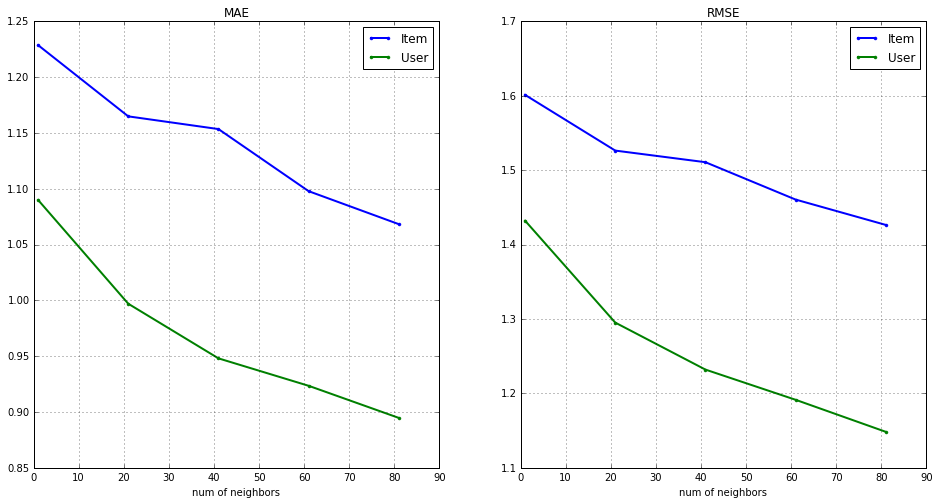

In [113]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(Neignbors , Item_Mae, '.-', lw = 2)
plt.plot(Neignbors , User_Mae, '.-', lw = 2)
plt.legend(['Item', 'User']); plt.xlabel('num of neighbors'), plt.title('MAE')
plt.grid()

plt.subplot(1,2,2)
plt.plot(NumNeighborsRange, ItemRMSE, '.-', lw = 2)
plt.plot(NumNeighborsRange, UserRMSE, '.-', lw = 2)
plt.legend(['Item', 'User']); plt.xlabel('num of neighbors'), plt.title('RMSE')
plt.grid()

* User - based recommendations have lower errors.
* Number of neighbors has positive effect, the more neighbors - the less error is.  

We can see that with jaccard metric, the best we can get is around .90 when n=80 (by MAE)

It is possible to calculate the same for distance metric and cosine similarity (added in project), but results are quite similar

Here we compute 3 functions with different similarity metrics, and we receive exactly the same results. So choise os similarity metric wouldn't have affected plot

In [67]:
[CVerror(path = '/home/hpish/Data', nneighbors = 40, 
          RecFunc=getRecommendedItems, metric = 'mae',similarity = sim_pearson), CVerror(path = '/home/hpish/Data', nneighbors = 40, 
          RecFunc=getRecommendedItems, metric = 'mae',similarity = sim_cosine), CVerror(path = '/home/hpish/Data', nneighbors = 40, 
          RecFunc=getRecommendedItems, metric = 'mae',similarity = sim_distance)]

[1.155763628619477, 1.155763628619477, 1.155763628619477]

### SVD recommendations.

I use Oscar Celma's implementation -it's quite easy to implement, is fast, and allows to easily load the dataset

In [31]:
import recsys
import numpy as np


In [2]:
from recsys.algorithm.factorize import SVD
from recsys.datamodel.data import Data
from recsys.evaluation.prediction import RMSE, MAE

In [44]:
Rm =[]
Ma =[]
for k in range(10,100,20):
    Rmse_score =[]
    Mae_score = []
    for n in range(1,6):
        path = '/home/hpish/Data'
        filenametr = path + '/u' + str(n) + '.base'
        filenamets = path + '/u' + str(n) + '.test'
        datats = Data()
        datatr = Data()
        formatd = {'col':0, 'row':1, 'value':2, 'ids': 'int'}
        datats.load(filenamets, sep='\t', format=formatd)
        datatr.load(filenametr, sep='\t', format=formatd)
        test = datats
        train = datatr
        rmse = RMSE()
        mae = MAE()
        K=k
        svd = SVD()
        svd.set_data(train)
        svd.compute(k=K, min_values=5, pre_normalize=None, mean_center=True, post_normalize=True)
        rmse = RMSE()
        mae = MAE()
        for rating, item_id, user_id in test.get():
            try:
                pred_rating = svd.predict(item_id, user_id)
                rmse.add(rating, pred_rating)
                mae.add(rating, pred_rating)
            except KeyError:
                continue
        Rmse_score.append(rmse.compute())
        Mae_score.append(mae.compute())
    Rm.append(np.array(Rmse_score).mean())
    Ma.append(np.array(Mae_score).mean())


In [46]:
Neighbors = np.arange(1, 100, 20)
SVDMAE, SVDRMSE, = Ma,Rm


Plot results.

In [47]:
import matplotlib.pyplot as plt
% matplotlib inline

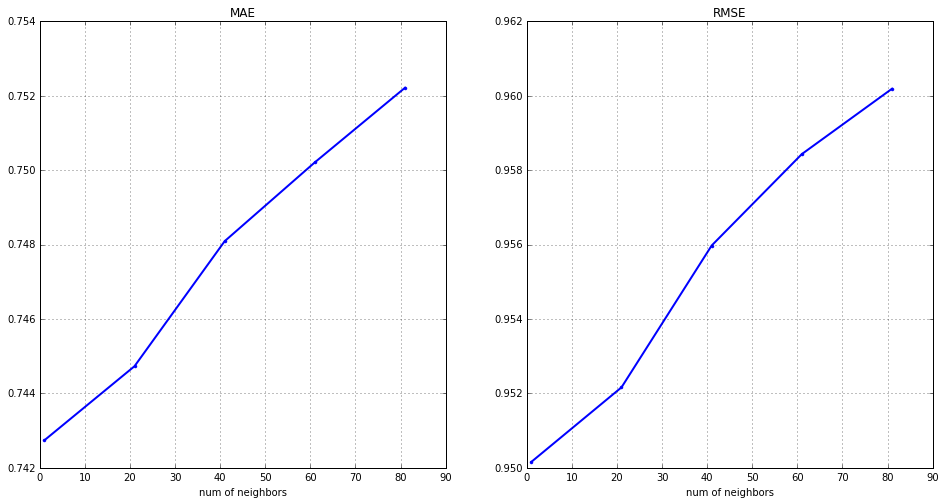

In [48]:
plt.figure(figsize=(16,8))
plt.xlabel('num of neighbors')
plt.subplot(1,2,1)

plt.plot(Neighbors,SVDMAE,'.-', lw = 2)
plt.title('MAE')
plt.xlabel('num of neighbors')
plt.grid()

plt.subplot(1,2,2)
plt.plot(Neighbors,SVDRMSE, '.-', lw = 2)
plt.title('RMSE')
plt.xlabel('num of neighbors')
plt.grid()

Interestingly, the accuracy actualy decreases with with number of neighbors, but extremely slightly. It may have something to do with insufficient data for enough calculations or high data variability, though CV is used

**Conclusion:**

We can observe that SVD calculation is far superior to other method-much,much faster, while yelds less mistakes
calculation time is around 5 minuts for SVD vs around an hour for User/Item beased approach and direct computation